<a href="https://colab.research.google.com/github/JingyanWu49/Statistic_PMA/blob/main/5520262_Statistics_PMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import norm, t
import math

#Q1

In [40]:
#import the data from q1
data_q1 = {
    "Country":['Belgiumm', 'Denmark', 'France', 'Germany', 'Greece', 'Ireland', 'Italy', 'Netherlands', 'Portugal', 'Spain', 'U.K.'],
    "GDP":[161800,104100,956900,1189100,53400,33900,856800,223600,45300,375700,832600],
    "Logistics Bill":[19000,14000,110000,160000,7000,5000,102000,27000,6000,45000,96000]
}

df_q1 = pd.DataFrame(data_q1)

df_q1

,Country,GDP,Logistics Bill
0,Belgiumm,161800,19000
1,Denmark,104100,14000
2,France,956900,110000
3,Germany,1189100,160000
4,Greece,53400,7000
5,Ireland,33900,5000
6,Italy,856800,102000
7,Netherlands,223600,27000
8,Portugal,45300,6000
9,Spain,375700,45000


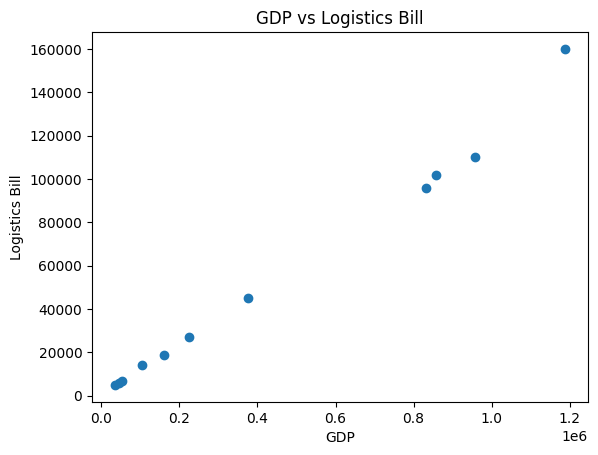

In [41]:
# Draw scatter plots

# GDP as x-axis, Logistics_ Bill as y-axis
plt.scatter(df_q1['GDP'], df_q1['Logistics Bill'])

# Add title and axis labels
plt.title('GDP vs Logistics Bill')
plt.xlabel('GDP')
plt.ylabel('Logistics Bill')

# show
plt.show()

In [42]:
#extract gpd and logistics

X_gdp = df_q1['GDP'].values.reshape(-1,1)
y_logistics_bill = df_q1['Logistics Bill'].values

X_gdp,y_logistics_bill

(array([[ 161800],
        [ 104100],
        [ 956900],
        [1189100],
        [  53400],
        [  33900],
        [ 856800],
        [ 223600],
        [  45300],
        [ 375700],
        [ 832600]]),
 array([ 19000,  14000, 110000, 160000,   7000,   5000, 102000,  27000,
          6000,  45000,  96000]))

In [43]:
#get the regression line

#using linear regression to fit
X_gdp_with_constant = sm.add_constant(X_gdp)
model_q1 = sm.OLS(y_logistics_bill, X_gdp_with_constant).fit()
intercept_q1, x_coefficient_q1 = model_q1.params

#print the line
print(f"Intercept: {intercept_q1:.2f}")
print(f"Slope (Coefficient of X): {x_coefficient_q1:.2f}")
regression_line = f"Regression Line Equation: y = {x_coefficient_q1:.2f}x {intercept_q1:.2f}"
print(regression_line)

Intercept: -727.56
Slope (Coefficient of X): 0.12
Regression Line Equation: y = 0.12x -727.56


In [44]:
#summary of using linear regression
multiple_r_q1 = np.sqrt(model_q1.rsquared)

num_observations_q1 = len(X_gdp)
#num_predictors_q1 = X_gdp.shape[1] - 1
adjusted_r_square_q1 = model_q1.rsquared_adj
standard_error_q1 = np.sqrt(model_q1.scale)

regression_statistics_q1 = {
    "Regression Statistics": ["Multiple R", "R Square", "Adjusted R Square", "Standard Error", "Observations"],
    "Value": [multiple_r_q1, model_q1.rsquared, adjusted_r_square_q1, standard_error_q1, num_observations_q1]
}

#print the summary table
regression_stats_df_q1 = pd.DataFrame(regression_statistics_q1)
regression_stats_df_q1.set_index("Regression Statistics", inplace=True)
print(regression_stats_df_q1)

                             Value
Regression Statistics             
Multiple R                0.994761
R Square                  0.989550
Adjusted R Square         0.988389
Standard Error         5801.482154
Observations             11.000000


In [45]:
print(model_q1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     852.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):           3.17e-10
Time:                        10:52:08   Log-Likelihood:                -109.83
No. Observations:                  11   AIC:                             223.7
Df Residuals:                       9   BIC:                             224.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -727.5553   2557.156     -0.285      0.7

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [46]:
def chi_square_normality_test(data):
    # Sort the data
    sorted_data = np.sort(data)
    # Divide data into quartiles
    quartiles = np.percentile(sorted_data, [25, 50, 75])
    # Count how many observations fall into each quartile
    observed = np.array([
        np.sum(sorted_data <= quartiles[0]),
        np.sum((sorted_data > quartiles[0]) & (sorted_data <= quartiles[1])),
        np.sum((sorted_data > quartiles[1]) & (sorted_data <= quartiles[2])),
        np.sum(sorted_data > quartiles[2])
    ])
    # Expected frequencies assuming a normal distribution
    expected = np.array([len(data)/4] * 4)
    # Perform the Chi-Square test
    chi2_stat, p_val = stats.chisquare(observed, f_exp=expected)
    return chi2_stat, p_val

# Applying the test to GDP and Logistics Bill data
gdp_chi2_stat, gdp_p_val = chi_square_normality_test(data_q1['GDP'])
logistics_chi2_stat, logistics_p_val = chi_square_normality_test(data_q1['Logistics Bill'])

# Printing the results in a more detailed format
print("Chi-Square Goodness of Fit Test Results:")

print("\nGDP Data:")
print(f"Chi-Square Statistic: {gdp_chi2_stat}")
print(f"P-value: {gdp_p_val}")
print("Interpretation: ", "Normal Distribution" if gdp_p_val > 0.05 else "Not a Normal Distribution")

print("\nLogistics Bill Data:")
print(f"Chi-Square Statistic: {logistics_chi2_stat}")
print(f"P-value: {logistics_p_val}")
print("Interpretation: ", "Normal Distribution" if logistics_p_val > 0.05 else "Not a Normal Distribution")

Chi-Square Goodness of Fit Test Results:

GDP Data:
Chi-Square Statistic: 0.2727272727272727
P-value: 0.9650733888869292
Interpretation:  Normal Distribution

Logistics Bill Data:
Chi-Square Statistic: 0.2727272727272727
P-value: 0.9650733888869292
Interpretation:  Normal Distribution


In [47]:
from statsmodels.formula.api import ols
model_q1 = ols('y_logistics_bill ~ X_gdp', data=data_q1).fit()

anova_table = sm.stats.anova_lm(model_q1, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
X_gdp,2.868527e+10,1.0,852.277408,3.166591e-10
Residual,3.029148e+08,9.0,NaN,NaN


In [48]:
# Add the Mean Square column
anova_table['MS'] = anova_table['sum_sq'] / anova_table['df']

# Create a formatted ANOVA table with the required columns and values
formatted_anova_table = pd.DataFrame({
    'df': [anova_table.loc['X_gdp', 'df'], anova_table.loc['Residual', 'df'], model_q1.df_model + model_q1.df_resid],
    'SS': [anova_table.loc['X_gdp', 'sum_sq'], anova_table.loc['Residual', 'sum_sq'], model_q1.ssr + model_q1.ess],
    'MS': [anova_table.loc['X_gdp', 'MS'], anova_table.loc['Residual', 'MS'], np.nan],
    'F': [anova_table.loc['X_gdp', 'F'], np.nan, np.nan],
    'Significance F': [anova_table.loc['X_gdp', 'PR(>F)'], np.nan, np.nan]
}, index=['Regression', 'Residual', 'Total'])

# Output the ANOVA table
formatted_anova_table

,df,SS,MS,F,Significance F
Regression,1.0,2.868527e+10,2.868527e+10,852.277408,3.166591e-10
Residual,9.0,3.029148e+08,3.365720e+07,NaN,NaN
Total,10.0,2.898818e+10,NaN,NaN,NaN


In [49]:
#get residuals
df_q1['Logistics Bill Prediction'] = intercept_q1 + df_q1['GDP'] * x_coefficient_q1
df_q1['Residuals'] = df_q1['Logistics Bill'] - df_q1['Logistics Bill Prediction']

df_q1

,Country,GDP,Logistics Bill,Logistics Bill Prediction,Residuals
0,Belgiumm,161800,19000,19325.143309,-325.143309
1,Denmark,104100,14000,12174.088242,1825.911758
2,France,956900,110000,117865.938523,-7865.938523
3,Germany,1189100,160000,146643.667927,13356.332073
4,Greece,53400,7000,5890.578850,1109.421150
5,Ireland,33900,5000,3473.844468,1526.155532
6,Italy,856800,102000,105460.035365,-3460.035365
7,Netherlands,223600,27000,26984.332271,15.667729
8,Portugal,45300,6000,4886.704568,1113.295432
9,Spain,375700,45000,45834.860447,-834.860447


In [50]:
df_q1['Residuals']

0      -325.143309
1      1825.911758
2     -7865.938523
3     13356.332073
4      1109.421150
5      1526.155532
6     -3460.035365
7        15.667729
8      1113.295432
9      -834.860447
10    -6460.806030
Name: Residuals, dtype: float64

count    1.100000e+01
mean    -9.177628e-12
std      5.503769e+03
min     -7.865939e+03
25%     -2.147448e+03
50%      1.566773e+01
75%      1.319725e+03
max      1.335633e+04
Name: Residuals, dtype: float64


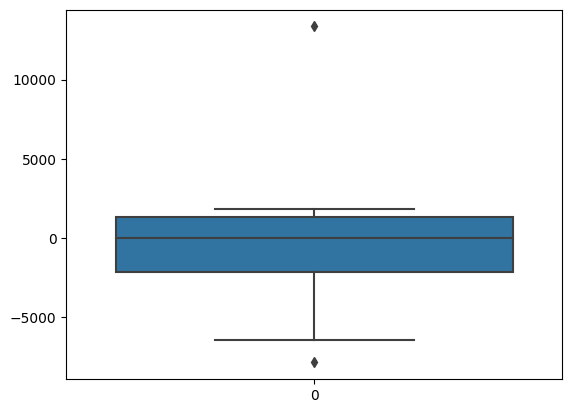

Lower bound for outliers: -7348.2079871271835
Upper bound for outliers: 6520.485562912661


In [51]:
residuals=pd.Series(df_q1['Residuals'])

print(residuals.describe())

sns.boxplot(residuals)
plt.show()

q1 = residuals.quantile(0.25)
q3 = residuals.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
print(f'Lower bound for outliers: {lower_bound}')
print(f'Upper bound for outliers: {upper_bound}')


In [52]:
# Calculate mean and standard dviation
residuals_mean = np.mean(residuals)
residuals_std_dev = np.std(residuals, ddof=1)

# Calculate Sturges' number of bins
n = len(residuals)
k = int(1 + 3.322 * np.log10(n))
classrange=np.ptp(residuals)/k
print("Rounded Number of classes:",k)
print("class Range:",classrange)
# Histogram and expected frequencies
hist, bin_edges = np.histogram(residuals, bins=k)
cdf_values = stats.norm.cdf(bin_edges+classrange, residuals_mean, residuals_std_dev)

Rounded Number of classes: 4
class Range: 5305.567649102657


In [53]:
# Create a DataFrame for histogram data
hist_df1 = pd.DataFrame({'residuals': bin_edges[:-1], 'Frequency': hist})

bin_frequencies = []
for i in range(0, len(cdf_values)-1):
    if i==0:
      frequency=cdf_values[0]
    else:
      frequency = cdf_values[i] - cdf_values[i - 1]
    bin_frequencies.append(frequency)
bin_frequencies= np.array(bin_frequencies)
# Expected values
expected_values = bin_frequencies * n

# Normalize expected frequencies
expected_frequencies_normalized = expected_values * (hist.sum() / expected_values.sum())

bin_frequencies,expected_values,expected_frequencies_normalized

(array([0.32089299, 0.37014154, 0.23720071, 0.06414762]),
 array([3.52982284, 4.07155692, 2.60920781, 0.70562383]),
 array([3.55691639, 4.10280861, 2.62923508, 0.71103992]))

In [54]:
# Calculate chi-square values for each bin
chi_square_values = (hist - expected_values) ** 2 / expected_values
chi_square_df1 = pd.DataFrame({'χ^2': chi_square_values})
# Add a row for the sum of chi-square values
chi_square_df1.loc['Sum'] = chi_square_df1.sum()

# Chi-square goodness of fit test
chi_square_stat, p_value = stats.chisquare(hist, f_exp=expected_frequencies_normalized,ddof=2)
hist_df1.residuals=hist_df1.residuals+classrange
print("Classes:")
print(hist_df1, "\n")
bin_centers = bin_edges[1:]

Classes:
      residuals  Frequency
0  -2560.370874          3
1   2745.196775          7
2   8050.764424          0
3  13356.332073          1 



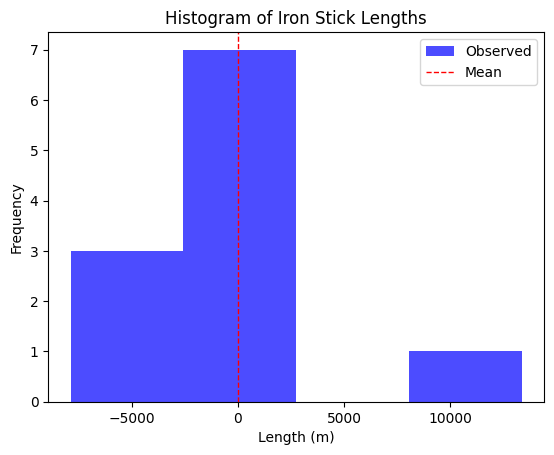

Chi-Square Table:
          χ^2
0    0.079526
1    2.106265
2    2.609208
3    0.122810
Sum  4.917808


In [55]:
# Histogram
plt.hist(residuals, bins=bin_edges, alpha=0.7, color='blue', label='Observed')
plt.axvline(residuals_mean, color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.title('Histogram of Iron Stick Lengths')
plt.xlabel('Length (m)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print("Chi-Square Table:")
print(chi_square_df1)

In [56]:
# Combined table of CDF, Bin Frequency, and Expected Value
table_df = pd.DataFrame({
    'CDF': cdf_values[:-1],  # Exclude the last CDF value which is always 1
    'Bin Frequency': bin_frequencies,
    'Expected Value': expected_values
})

# Add a 'Sum' row at the end of the DataFrame
sum_row = pd.DataFrame({
    'CDF': ['Sum ='],
    'Bin Frequency': [bin_frequencies.sum()],
    'Expected Value': [expected_frequencies_normalized.sum()]
})

# Append the sum row to the table
table_df = table_df.append(sum_row, ignore_index=True)

# Print the results
print(f"Number of classes (bins) using Sturges' formula: {k}")
print(f"Chi-square Statistic: {chi_square_values.sum()}, p-value: {p_value}")


# Display the table
table_df

Number of classes (bins) using Sturges' formula: 4
Chi-square Statistic: 4.917808465816049, p-value: 0.027174175331706178


<ipython-input-56-1065cf869e19>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table_df = table_df.append(sum_row, ignore_index=True)


,CDF,Bin Frequency,Expected Value
0,0.320893,0.320893,3.529823
1,0.691035,0.370142,4.071557
2,0.928235,0.237201,2.609208
3,0.992383,0.064148,0.705624
4,Sum =,0.992383,11.000000


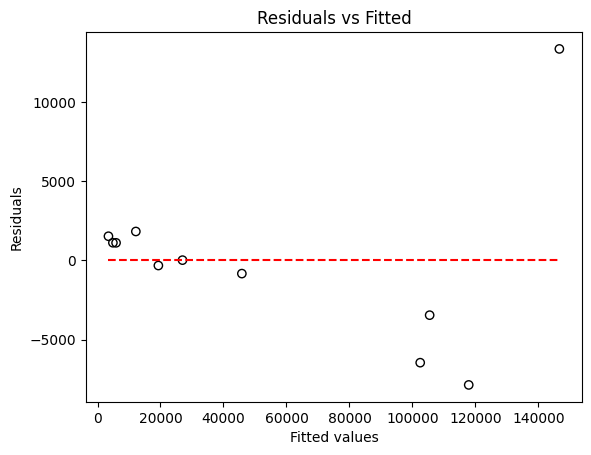

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

fitted = model_q1.fittedvalues

plt.scatter(fitted, residuals, edgecolors='k', facecolors='none')
plt.hlines(y=0, xmin=np.min(fitted), xmax=np.max(fitted), colors='r', linestyles='dashed')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.show()


In [58]:
# Extracting the coefficient for GDP
coef_gdp = x_coefficient_q1

# Extracting the standard error of the GDP coefficient
residual_std = np.std(residuals)
gdp_values = df_q1['GDP']  # 假设 'GDP' 是你的 GDP 列的列名
gdp_std = np.std(gdp_values)
std_err_gdp = residual_std / (np.sqrt(len(gdp_values)) * gdp_std)

# Degrees of freedom = number of observations - number of parameters (including the intercept)
df = len(y_logistics_bill) - 2  # Assuming you have a constant term

# Critical value for 95% confidence from the t-distribution
from scipy.stats import t
alpha = 0.05  # 95% confidence level
critical_value = t.ppf(1 - alpha/2, df)

# Calculating the 95% confidence interval
conf_interval_lower = coef_gdp - critical_value * std_err_gdp
conf_interval_upper = coef_gdp + critical_value * std_err_gdp

print(f"Coefficient for GDP: {coef_gdp}")
print(f"95% Confidence Interval for GDP: ({conf_interval_lower}, {conf_interval_upper})")


Coefficient for GDP: 0.1239350964840197
95% Confidence Interval for GDP: (0.11524846280618349, 0.13262173016185588)


In [59]:
# GDP value for prediction
gdp_prediction = 600000  # $600,000 million dollars

# Calculate the point estimate
point_estimate = intercept_q1 + x_coefficient_q1 * gdp_prediction

# Calculate the standard error of the regression
std_err_regression = np.std(model_q1.resid)

# Calculate the critical value for a 95% prediction interval
alpha = 0.05  # 95% prediction interval
n = len(df_q1)  # Number of observations
df = n - 2  # Degrees of freedom (assuming a constant term)
critical_value = t.ppf(1 - alpha/2, df)

# Calculate the prediction interval
prediction_interval_lower = point_estimate - (critical_value * std_err_regression)
prediction_interval_upper = point_estimate + (critical_value * std_err_regression)

print(f"Expected Logistics Bill for GDP of $600,000 million dollars: {point_estimate}")
print(f"95% Prediction Interval: ({prediction_interval_lower}, {prediction_interval_upper})")

Expected Logistics Bill for GDP of $600,000 million dollars: 73633.50258799692
95% Prediction Interval: (61762.52057545328, 85504.48460054056)


In [60]:
# Hypothesis Testing for intercept (whether it passes through the origin)
from scipy import stats

# Get the intercept coefficient and its standard error
intercept_coeff = model_q1.params['Intercept']
intercept_std_err = model_q1.bse['Intercept']

# Calculate the t-statistic
t_statistic = intercept_coeff / intercept_std_err

# Degrees of freedom
df = len(df_q1) - 2  # Assuming a constant term

# Significance level
alpha = 0.05

# Calculate the p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))


print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")


t-statistic: -0.28451742247298323
p-value: 0.7824518613127256


#Q2

Q2(i)

In [61]:
data2 = {
    'Carbonation': np.repeat([10, 12], repeats=20), # Two levels of carbonation, each repeated 20 times (4 speeds * 5 measurements)
    'Line_Speed': np.tile(np.repeat([210, 240, 270, 300], repeats=5), 2), # Four line speeds, each with 5 measurements, repeated for both carbonation levels
    'Deviation': [ # The deviation measurements from the image, in the same order
        0.4, 2.0, 3.0, 1.7, 1.8, # 210 bpm for 10%
        0.5, 2.0, 0.9, 1.9, 6.0, # 240 bpm for 10%
        4.7, 3.4, 1.2, 3.1, 4.3, # 270 bpm for 10%
        3.6, 2.6, 2.4, 3.8, 5.1, # 300 bpm for 10%
        1.5, 2.0, 2.8, 2.1, 2.0, # 210 bpm for 12%
        3.4, 2.1, 0.6, 4.5, 1.6, # 240 bpm for 12%
        4.4, 4.2, 3.2, 3.7, 2.9, # 270 bpm for 12%
        4.3, 3.3, 4.2, 3.8, 3.5  # 300 bpm for 12%
    ]
}
df2 = pd.DataFrame(data2)

df2

,Carbonation,Line_Speed,Deviation
0,10,210,0.4
1,10,210,2.0
2,10,210,3.0
3,10,210,1.7
4,10,210,1.8
5,10,240,0.5
6,10,240,2.0
7,10,240,0.9
8,10,240,1.9
9,10,240,6.0


In [62]:

# Group the data by 'Carbonation' and 'Line_Speed' and calculate the frequencies of 'Deviation' values
grouped_data = df2.groupby(['Carbonation', 'Line_Speed'])['Deviation'].value_counts().reset_index(name='Frequency')

# Initialize list to store test results for each group
chi_square_results_discrete = []

# Iterate over each group
for (carbonation, speed), group in grouped_data.groupby(['Carbonation', 'Line_Speed']):
    # Observed frequencies
    observed_counts = group['Frequency'].values

    # Expected frequencies under a normal distribution
    expected_mean = np.mean(group['Deviation'])
    expected_std = np.std(group['Deviation'], ddof=1)
    expected_frequencies = stats.norm.pdf(group['Deviation'], expected_mean, expected_std)
    expected_frequencies /= expected_frequencies.sum()  # Normalize to sum to 1
    expected_counts = expected_frequencies * sum(observed_counts)

    # Perform the Chi-Square test
    chi_square_statistic, p_value = stats.chisquare(f_obs=observed_counts, f_exp=expected_counts)

    # Store results
    chi_square_results_discrete.append({
        'Carbonation': carbonation,
        'Line_Speed': speed,
        'Chi_Square_Statistic': chi_square_statistic,
        'P_Value': p_value
    })

# Convert results to DataFrame
chi_square_results_discrete_df = pd.DataFrame(chi_square_results_discrete)
chi_square_results_discrete_df



,Carbonation,Line_Speed,Chi_Square_Statistic,P_Value
0,10,210,1.268152,0.866755
1,10,240,1.714692,0.788047
2,10,270,1.141247,0.887674
3,10,300,0.841125,0.932851
4,12,210,0.468672,0.925718
5,12,240,0.631296,0.959523
6,12,270,0.364737,0.985261
7,12,300,0.334927,0.987449


In [63]:
# Model specification including interaction term
model2 = ols('Deviation ~ C(Carbonation) + C(Line_Speed) + C(Carbonation):C(Line_Speed)', data=df2).fit()

# Perform the ANOVA
anova_results2 = sm.stats.anova_lm(model2, typ=2)

anova_results2

,sum_sq,df,F,PR(>F)
C(Carbonation),0.81225,1.0,0.549653,0.463866
C(Line_Speed),21.87475,3.0,4.934247,0.006281
C(Carbonation):C(Line_Speed),0.03875,3.0,0.008741,0.998854
Residual,47.28800,32.0,NaN,NaN


Q2(ii)

In [64]:
from scipy.stats import poisson
# Given lambda (average rate of breakdowns per shift)
lambda_per_shift = 1.5

# Calculate the probabilities using the Poisson distribution

# Probability of exactly two breakdowns during the night shift
prob_two_breakdowns = poisson.pmf(2, lambda_per_shift)

# Probability of less than two breakdowns during the afternoon shift (0 or 1 breakdown)
prob_less_than_two_breakdowns = poisson.cdf(1, lambda_per_shift)

# Probability of no breakdowns during three consecutive shifts
# Since each shift is independent, the probabilities can be multiplied
prob_no_breakdowns_three_shifts = poisson.pmf(0, lambda_per_shift) ** 3

prob_two_breakdowns, prob_less_than_two_breakdowns, prob_no_breakdowns_three_shifts

(0.25102143016698353, 0.5578254003710748, 0.011108996538242304)

#Q3

Q3(i)

In [65]:
# Given data for computer-assisted learning and group-based learning
computer_assisted_learning = [19.4, 20.7, 21.8, 14.4, 16.1, 16.8, 14.7, 16.7, 19.3, 16.8, 17.7, 19.8]
group_based_learning = [18.7, 24.4, 19.3, 15.6, 18.0, 21.7, 27.0, 13.8, 18.0, 20.8, 17.1, 28.2]

In [66]:
# Updated function to calculate the number of bins using the alternative Sturges' formula and print chi-square and p-value
def chi_square_normality_test_results_sturges(data):
    # Calculate number of bins using the alternative Sturges' formula
    num_bins = int(1 + 3.322 * np.log10(len(data)))

    # Perform the histogram binning and chi-square test
    observed_frequencies, bin_edges = np.histogram(data, bins=num_bins)
    cdf_expected = stats.norm.cdf(bin_edges, np.mean(data), np.std(data, ddof=1))
    expected_frequencies = np.diff(cdf_expected) * len(data)
    expected_frequencies *= np.sum(observed_frequencies) / np.sum(expected_frequencies)
    chi2_stat, p_value = stats.chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

    # Create a DataFrame to display the table
    classes = [f"{bin_edges[i]:.2f} - {bin_edges[i+1]:.2f}" for i in range(len(bin_edges)-1)]
    table = pd.DataFrame({
        'Cls': classes,
        'Obs Freq': observed_frequencies,
        'Exp Freq': expected_frequencies,
        'Diff': observed_frequencies - expected_frequencies,
        'Diff Sq': (observed_frequencies - expected_frequencies)**2,
        'Diff Sq/Exp Freq': (observed_frequencies - expected_frequencies)**2 / expected_frequencies
    })

    # Return the table and the chi-square result separately
    return table, chi2_stat, p_value

# Perform the chi-square normality test for each dataset using the alternative Sturges' formula for bins
table_computer_assisted_learning, chi2_computer, p_computer = chi_square_normality_test_results_sturges(computer_assisted_learning)
table_group_based_learning, chi2_group, p_group = chi_square_normality_test_results_sturges(group_based_learning)

# Display the tables for both datasets
print('Computer-Assisted Learning group\n',table_computer_assisted_learning)
print('Chi-square statistic:',chi2_computer)
print('P-value:',p_computer)
print('-----------------------------------------------------------------------------------')
print('Group-Based Learning group\n',table_group_based_learning)
print('Chi-square statistic:',chi2_group)
print('P-value:',p_group)



Computer-Assisted Learning group
              Cls  Obs Freq  Exp Freq      Diff   Diff Sq  Diff Sq/Exp Freq
0  14.40 - 16.25         3  2.403072  0.596928  0.356323          0.148278
1  16.25 - 18.10         4  4.006846 -0.006846  0.000047          0.000012
2  18.10 - 19.95         3  3.699285 -0.699285  0.489000          0.132188
3  19.95 - 21.80         2  1.890796  0.109204  0.011925          0.006307
Chi-square statistic: 0.28678450410050993
P-value: 0.9624944898703913
-----------------------------------------------------------------------------------
Group-Based Learning group
              Cls  Obs Freq  Exp Freq      Diff   Diff Sq  Diff Sq/Exp Freq
0  13.80 - 17.40         3  2.540677  0.459323  0.210977          0.083040
1  17.40 - 21.00         5  4.151399  0.848601  0.720124          0.173465
2  21.00 - 24.60         2  3.621620 -1.621620  2.629653          0.726098
3  24.60 - 28.20         2  1.686303  0.313697  0.098406          0.058356
Chi-square statistic: 1.0409593206

In [67]:
# Calculate means, standard deviations, and sample sizes
mean1 = np.mean(computer_assisted_learning)
std1 = np.std(computer_assisted_learning, ddof=1)
n1 = len(computer_assisted_learning)

mean2 = np.mean(group_based_learning)
std2 = np.std(group_based_learning, ddof=1)
n2 = len(group_based_learning)

# Calculate t-statistic
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# Degrees of freedom
df = n1 + n2 - 2

# Significance level (alpha)
alpha = 0.05

# Two-tailed critical t-value
t_critical = t.ppf(1 - alpha/2, df)

print('t statistic:',t_stat)
print('t critical:',t_critical)



t statistic: -1.6384042526010387
t critical: 2.0738730679040147


In [68]:
# Calculate means, standard deviations, and sample sizes
mean1 = np.mean(computer_assisted_learning)
std1 = np.std(computer_assisted_learning, ddof=1)
n1 = len(computer_assisted_learning)

mean2 = np.mean(group_based_learning)
std2 = np.std(group_based_learning, ddof=1)
n2 = len(group_based_learning)

# Calculate t-statistic
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# Degrees of freedom
df = n1 + n2 - 2

# Significance level (alpha)
alpha = 0.05

# Right-tailed critical t-value
t_critical = t.ppf(1 - alpha, df)

print('t statistic:',t_stat)
print('t critical:',t_critical)

t statistic: -1.6384042526010387
t critical: 1.717144374380242


In [69]:
# Calculate means, standard deviations, and sample sizes
mean1 = np.mean(computer_assisted_learning)
std1 = np.std(computer_assisted_learning, ddof=1)
n1 = len(computer_assisted_learning)

mean2 = np.mean(group_based_learning)
std2 = np.std(group_based_learning, ddof=1)
n2 = len(group_based_learning)

# Calculate t-statistic
pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))
t_stat = (mean1 - mean2) / (pooled_std * np.sqrt(1/n1 + 1/n2))

# Degrees of freedom
df = n1 + n2 - 2

# Significance level (alpha)
alpha = 0.05

# Right-tailed critical t-value
t_critical = t.ppf(1 - alpha, df)

# Print the calculated values
print("Mean 1:", mean1)
print("Standard Deviation 1:", std1)
print("Sample Size 1:", n1)
print('--------------------------------------------------')
print("Mean 2:", mean2)
print("Standard Deviation 2:", std2)
print("Sample Size 2:", n2)
print('--------------------------------------------------')
print("Degrees of Freedom:", df)
print("Significance Level (alpha):", alpha)
print('--------------------------------------------------')
print("Critical t-Value (Right-Tailed):", t_critical)
print("t Statistic:", t_stat)


Mean 1: 17.850000000000005
Standard Deviation 1: 2.344626351313302
Sample Size 1: 12
--------------------------------------------------
Mean 2: 20.216666666666665
Standard Deviation 2: 4.420578599178522
Sample Size 2: 12
--------------------------------------------------
Degrees of Freedom: 22
Significance Level (alpha): 0.05
--------------------------------------------------
Critical t-Value (Right-Tailed): 1.717144374380242
t Statistic: -1.6384042526010387


Q3(2)

In [70]:
# Sample statistics
sample_mean = 44.175
sample_std = math.sqrt(1.017)  # Standard deviation
n = 100

# Provided data
lower_spec = 41.5  # Lower specification limit
upper_spec = 46.5  # Upper specification limit

# Calculate the proportion exceeding specifications
z_lower = (lower_spec - sample_mean) / sample_std
z_upper = (upper_spec - sample_mean) / sample_std

# Calculate cumulative probabilities exceeding lower and upper limits
p_lower = norm.cdf(z_lower)
p_upper = norm.cdf(z_upper)

# Calculate the total proportion exceeding specifications
proportion_out_of_spec = (p_lower + (1 - p_upper))

# Print all calculated values
print("Lower Specification Limit:", lower_spec)
print("Upper Specification Limit:", upper_spec)
print("Z-score for Lower Limit:", z_lower)
print("Z-score for Upper Limit:", z_upper)
print("Cumulative Probability (Lower Limit):", p_lower)
print("Cumulative Probability (Upper Limit):", p_upper)
print('-----------------------------------------------------------')
print("Proportion Exceeding Specifications:", proportion_out_of_spec)

Lower Specification Limit: 41.5
Upper Specification Limit: 46.5
Z-score for Lower Limit: -2.65254835633475
Z-score for Upper Limit: 2.30548595457133
Cumulative Probability (Lower Limit): 0.003994334205033778
Cumulative Probability (Upper Limit): 0.9894303137586099
-----------------------------------------------------------
Proportion Exceeding Specifications: 0.014564020446423874


In [71]:
# Calculate the standard error
standard_error = sample_std / math.sqrt(n)

# Z-critical value for a 95% confidence interval (two-tailed test)
z_critical = norm.ppf(0.975)  # Since it's a two-tailed test, use 0.975 instead of 0.95

# Calculate the confidence interval
confidence_interval_lower = sample_mean - z_critical * standard_error
confidence_interval_upper = sample_mean + z_critical * standard_error

# Print all calculated values
print("Standard Error:", standard_error)
print("Z-critical Value for 95% Confidence Interval (Two-Tailed Test):", z_critical)
print("Confidence Interval Lower Bound:", confidence_interval_lower)
print("Confidence Interval Upper Bound:", confidence_interval_upper)


Standard Error: 0.10084641788382967
Z-critical Value for 95% Confidence Interval (Two-Tailed Test): 1.959963984540054
Confidence Interval Lower Bound: 43.97734465297781
Confidence Interval Upper Bound: 44.37265534702218


In [72]:
target_mean = 44  # Target population mean
alpha = 0.05  # Significance level

# Calculate the Z-statistic
z_statistic = (sample_mean - target_mean) / (sample_std / math.sqrt(n))

# Calculate p-value (two-tailed test)
p_value = 2 * (1 - norm.cdf(abs(z_statistic)))

# Print all calculated values
print("Z-statistic:", z_statistic)
print("p-value:", p_value)

Z-statistic: 1.7353120088170997
p-value: 0.08268555584109771
